In [37]:
import numpy as np
from numpy import random as random
import matplotlib.pyplot as plt


In [38]:
#variables
size= 20000 #int(input("Number Of Trades"))

prices=np.zeros(size)
pricesAv=np.zeros(size)
pricesAv2=np.zeros(size)
pricesV=np.zeros(size)
pricesAcc=np.zeros(size)
buy=np.zeros(size)
time=np.zeros(size)
temp=np.zeros(size)


In [39]:
def Backaverage(array,n,s):        
    return (( array[(np.clip(n-1 , 0 , s-1))] + array[(np.clip(n , 0 , s-1))])/2)
def average(array,n,s):
    return (array[(np.clip(n-1 , 0 , s-1))] +array[(np.clip(n+1 , 0 , s-1))]+ array[(np.clip(n , 0 , s-1))])/3
        
    
    

In [40]:
gen=True

In [41]:
def R(a,n,s,MAX):
    return  ( int(a[(np.clip(n-1,0,s))])  +  ((random.randint(-MAX,MAX))))

In [42]:



if(gen): 
    for x in range(size):
        temp[(x)]=(R(temp,x,size,10))

    open('prices.txt', 'w').close()
    for x in temp:
        f=open("prices.txt","a")
        f.write(str(x))
        f.write("\n")
    f.close()

In [25]:
for x in range(size):
    temp=open('prices.txt','r').read().split('\n')
    prices[(x)]=temp[(x)]
    time[(x)]=x

zero= prices.mean()
MaximumGraphValue= prices.max()

MinimumGraphValue= prices.min()


In [26]:
for x in range(size):
    pricesAv[(x)]  =  Backaverage(prices,x,size)
    pricesAv2[(x)]  =  average(prices,x,size)

In [27]:
for x in range(size):
    pricesV[(x)]=(pricesAv[(x)]-pricesAv[(np.clip(x-1,0,size))])
    pricesAcc[(x)]=pricesV[(x)]-pricesV[(np.clip(x-1,0,size))]

In [28]:
#Algorithm 1
def algo1(scale):
    for x in range(size):
        if(pricesAcc[(x)]==0):
            buy[(x)]=zero
        else:
            if(pricesV[(x)]-pricesAcc[(x)]<scale):
                buy[(x)]=1*MaximumGraphValue #buy
            elif(pricesV[(x)]-pricesAcc[(x)]>scale):
                buy[(x)]=1*MinimumGraphValue #sell

In [29]:
#Algorithm 2
def algo2(A,Acceleration,z,threshold):
    for index,price in enumerate(A):
        if(((price-z)>threshold)and (Acceleration[(index)]<0 )):   #
            buy[(x)]=1*MaximumGraphValue #buy
        else:
            buy[(x)]=1*MinimumGraphValue #sell
         




In [30]:
def initFile(filename):
    file=open(filename,'w')
    file.write("")
    file.close()


    file=open(filename,'a')
    file.write("ID,Amount,At Price,Total")
    file.write("\n")
    file.close()

In [31]:
initFile('trades.csv')
#algo1(1)
algo2(prices,pricesAcc,zero,1)

In [32]:
amt=1
cutoff=100
Total=1000
NumberOfTrades=0
buyCredits=0
profit=np.zeros(size)
start=Total

for id,x in enumerate(prices):
    if(Total>cutoff):
        if(buy[(id)]>zero):
            Total=Total-x*amt
            buyCredits+=1

            NumberOfTrades+=1
            profit[(id)]=(Total-start)
        elif((buy[(id)]<zero)and(buyCredits!=0)):
            Total=Total+x*amt
            buyCredits-=1

            profit[(id)]=(Total-start)
    elif(Total<cutoff):
        Total=Total #+int(input("Enter Funds"))
        

print(buyCredits)
print("{} Profit in {} Trades out of {} Total possible Trades".format(Total-start,NumberOfTrades,size))
print(Total)

19998
110604373.0 Profit in 19999 Trades out of 20000 Total possible Trades
110605373.0


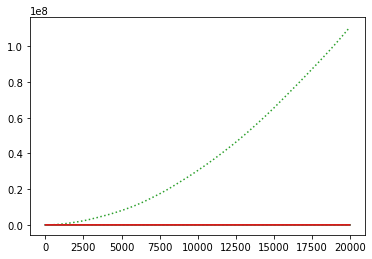

In [33]:
plt.plot(time,prices)
plt.plot(time,pricesAv,'g')
plt.plot(time,pricesAv2,':')
plt.plot(time,profit,':')
#plt.plot(time,pricesAcc,'o')
plt.plot(time,buy,'c')
plt.plot(time,np.full(size,zero),'r')

plt.show()


In [34]:
initFile('trades.csv')
algo1(1)
#algo2(prices,pricesAcc,zero,1)

In [35]:
amt=1
cutoff=100
Total=1000
NumberOfTrades=0
buyCredits=0
profit=np.zeros(size)
start=Total

for id,x in enumerate(prices):
    if(Total>cutoff):
        if(buy[(id)]>zero):
            Total=Total-x*amt
            buyCredits+=1

            NumberOfTrades+=1
            profit[(id)]=(Total-start)
        elif((buy[(id)]<zero)and(buyCredits!=0)):
            Total=Total+x*amt
            buyCredits-=1

            profit[(id)]=(Total-start)
    elif(Total<cutoff):
        Total=Total #+int(input("Enter Funds"))
        

print(buyCredits)
print("{} Profit in {} Trades out of {} Total possible Trades".format(Total-start,NumberOfTrades,size))
print(Total)

6121
32844366.0 Profit in 12564 Trades out of 20000 Total possible Trades
32845366.0


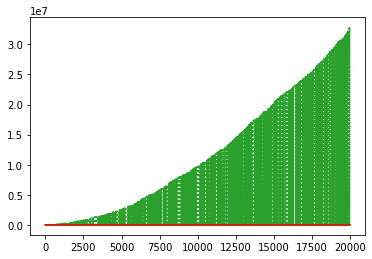

In [36]:
plt.plot(time,prices)
plt.plot(time,pricesAv,'g')
plt.plot(time,pricesAv2,':')
plt.plot(time,profit,':')
#plt.plot(time,pricesAcc,'o')
#plt.plot(time,buy,'c')
plt.plot(time,np.full(size,zero),'r')

plt.show()
